In [ ]:
from google.colab import files
upload= files.upload()

Saving BankChurners.csv to BankChurners.csv


In [ ]:
!pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import scikitplot as skplt

# imblearn Libraries
from imblearn.over_sampling import SMOTE
from imblearn import __version__ as imbv

# scipy Libraries
from scipy.stats import norm
from scipy import __version__ as scipv

# matplotlib Libraries
import matplotlib.pyplot as plt
from matplotlib import __version__ as mpv

# plotly Libraries
import plotly.express as ex
from plotly import __version__ as pvm

# sklearn Libraries
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import __version__ as skv
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, recall_score, confusion_matrix

# **Part 1: Exploratory Data Analysis**

## **Step 1: Loading the Dataset¶**

In [ ]:
import pandas as pd
bankData= pd.read_csv('BankChurners.csv')

## **Step 2: Display the Dimensions, Head and Description of the Data¶**

In [ ]:
print("The dimension of the data is: {:,} (rows) by {:,} (columns)".format(bankData.shape[0], bankData.shape[1]))


In [ ]:
bankData.head()


## **Step 3: Show Proportions of Categorical Variables¶**


**Proportion of Customer Genders**

In [ ]:
ex.pie(bankData, names='Gender', title='Proportion of Customer Genders')


There are slightly more female than male customers but the difference is so small that it won't have a significant impact on the overall data analysis. For all intends and purposes we can say that the genders are uniformly distributed.












---



**Proportion of Education Levels¶**


In [ ]:
ex.pie(bankData, names='Education_Level', title='Proportion of Education Levels')

We can see that the largest amount of customers have at least a graduate level education, with the second highest being high school level.

**Proportion of Marital Status**



In [ ]:
ex.pie(bankData, names='Marital_Status', title='Proportion of Marital Status')

From the graph above, we can see that the majority of customers are either married or single.



**Proportion of Different Income Levels**


In [ ]:
income = ex.pie(bankData, names='Income_Category', title='Proportion of Different Income Levels')

newNames = {'$40K - $60K': '$40K - 60K', '$60K - $80K': '$60K - 80K', '$80K - $120K': '$80K - 120K'}

for item in newNames:
    for i, elem in enumerate(income.data[0].labels):
        if elem == item:
            income.data[0].labels[i] = newNames[item]
income

From the graph above, we can see that the majority of customers earn less than $40k a year.



**Proportion of Different Card Categories**




In [ ]:
ex.pie(bankData, names='Card_Category', title='Proportion of Different Card Categories')

Since the majority of the customer data we have is of existing customers, i will be using SMOTE to upsample the attrited samples to match them with the regular customer sample size to balance out the skewed data and thus, also helping to improve the performance of the later selected models.

## **Proportion of Attrited vs Existing Customers**


In [ ]:
ex.pie(bankData, names='Attrition_Flag', title='Proportion of Attrited vs Existing Customers')


## **Step 4: Show Distributions of Numerical Variables**


---
**Histograms:**
*  Customer Age
*  Dependent Count
*  Months on Book
*  Total Relationship Count
*  Months Inactive (12 Months)
*  Credit Limit
*  Total Transaction Amount
*  Average Utilization Ratio



In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.5)
fig.set_size_inches(13.5, 15)
sb.set(font_scale = 1.25)

hists = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
        'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

i = 1
for var in hists:
    fig.add_subplot(4, 2, i)
    sb.distplot(pd.Series(bankData[var], name=''),
                fit=norm, kde=False).set_title(var + " Histogram")
    plt.ylabel('Count')
    i += 1

fig.tight_layout()

**Box Plots:**

* Customer Age
* Dependent Count
* Months on Book
* Total Relationship Count
* Months Inactive (12 Months)
* Credit Limit
* Total Transaction Amount
* Average Utilization Ratio




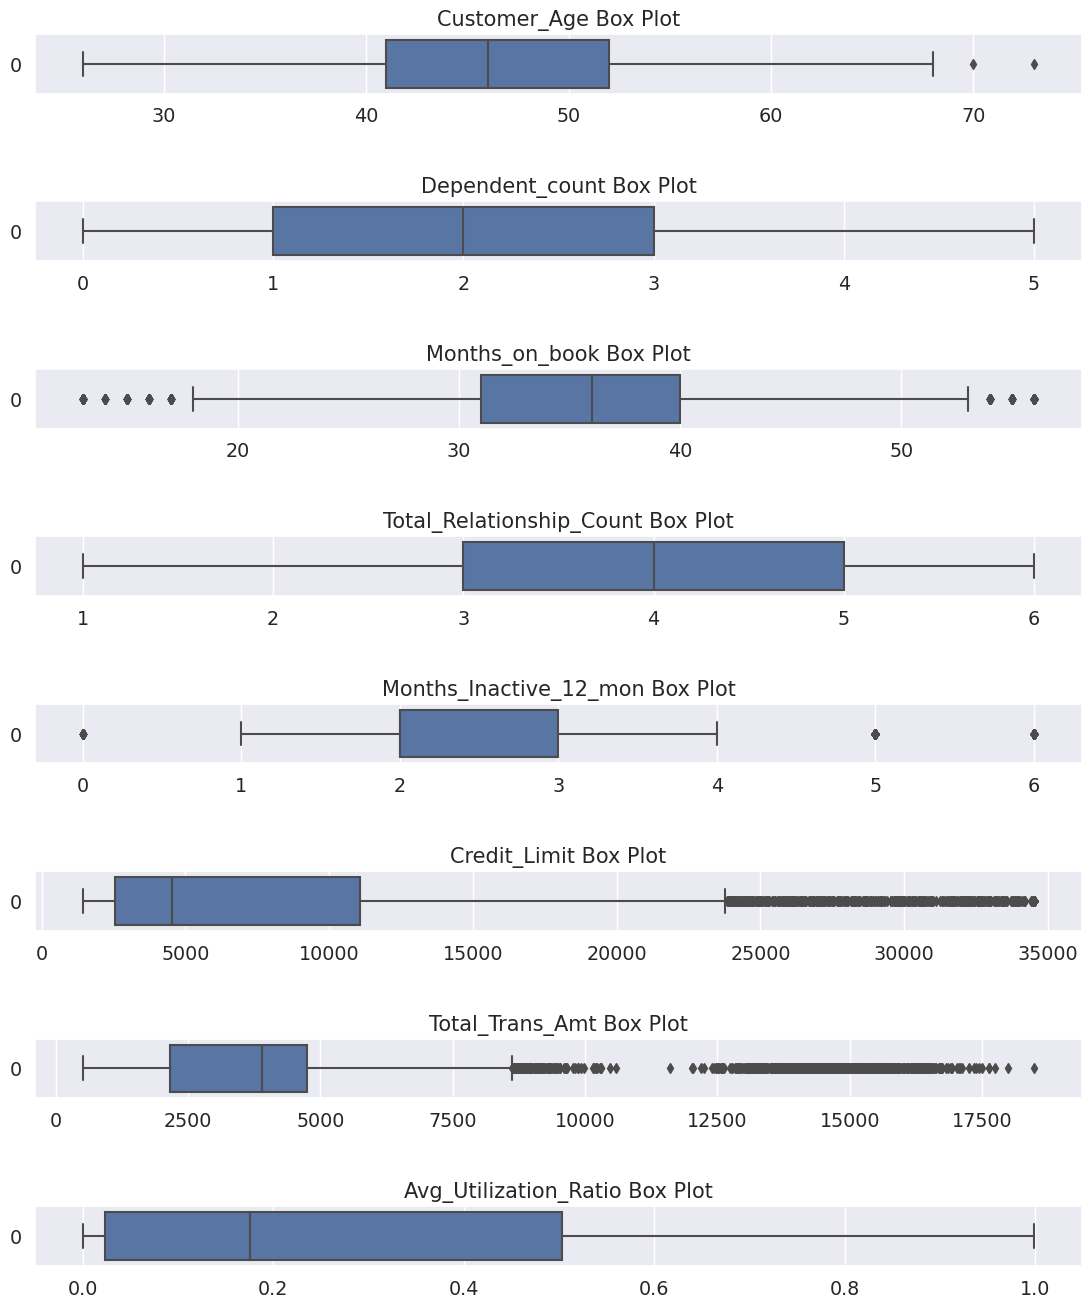

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=1.8, wspace=1.5)
fig.set_size_inches(13.5, 16)
sb.set(font_scale = 1.25)

boxs = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
        'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

i = 1
for var in boxs:
    fig.add_subplot(8, 1, i)
    sb.boxplot(pd.Series(bankData[var], name=''), orient="h").set_title(var + " Box Plot")
    i += 1



# **Part 2: Data Preprocessing and Feature Reduction**

## **Step 1: Encode Categorical Variables, Remove Missing Data and Drop Unneeded Columns**
**Get Dummies of categorical variables and concat them to the main dataframe (along with dropping missing values)**



In [ ]:
bankData['Attrition_Flag'] = bankData['Attrition_Flag'].replace({'Attrited Customer':1, 'Existing Customer':0})
bankData['Gender'] = bankData['Gender'].replace({'F':1, 'M':0})

bankData = pd.concat([bankData, pd.get_dummies(bankData['Education_Level']).drop(columns=['Unknown'])], axis=1)
bankData = pd.concat([bankData, pd.get_dummies(bankData['Income_Category']).drop(columns=['Unknown'])], axis=1)
bankData = pd.concat([bankData, pd.get_dummies(bankData['Marital_Status']).drop(columns=['Unknown'])], axis=1)
bankData = pd.concat([bankData, pd.get_dummies(bankData['Card_Category']).drop(columns=['Platinum'])], axis=1)

**Drop Unneeded Columns from Dataset**


In [ ]:
bankData.drop(columns = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category', 'CLIENTNUM'], inplace=True)

**New Dataset Dimensions**


In [ ]:
print("The dimension of the data is: {:,} (rows) by {:,} (columns)".format(bankData.shape[0], bankData.shape[1]))

In [ ]:
bankData.head()

**Annotated Correlation Matrix of all Features of the Dataset**


<Axes: >

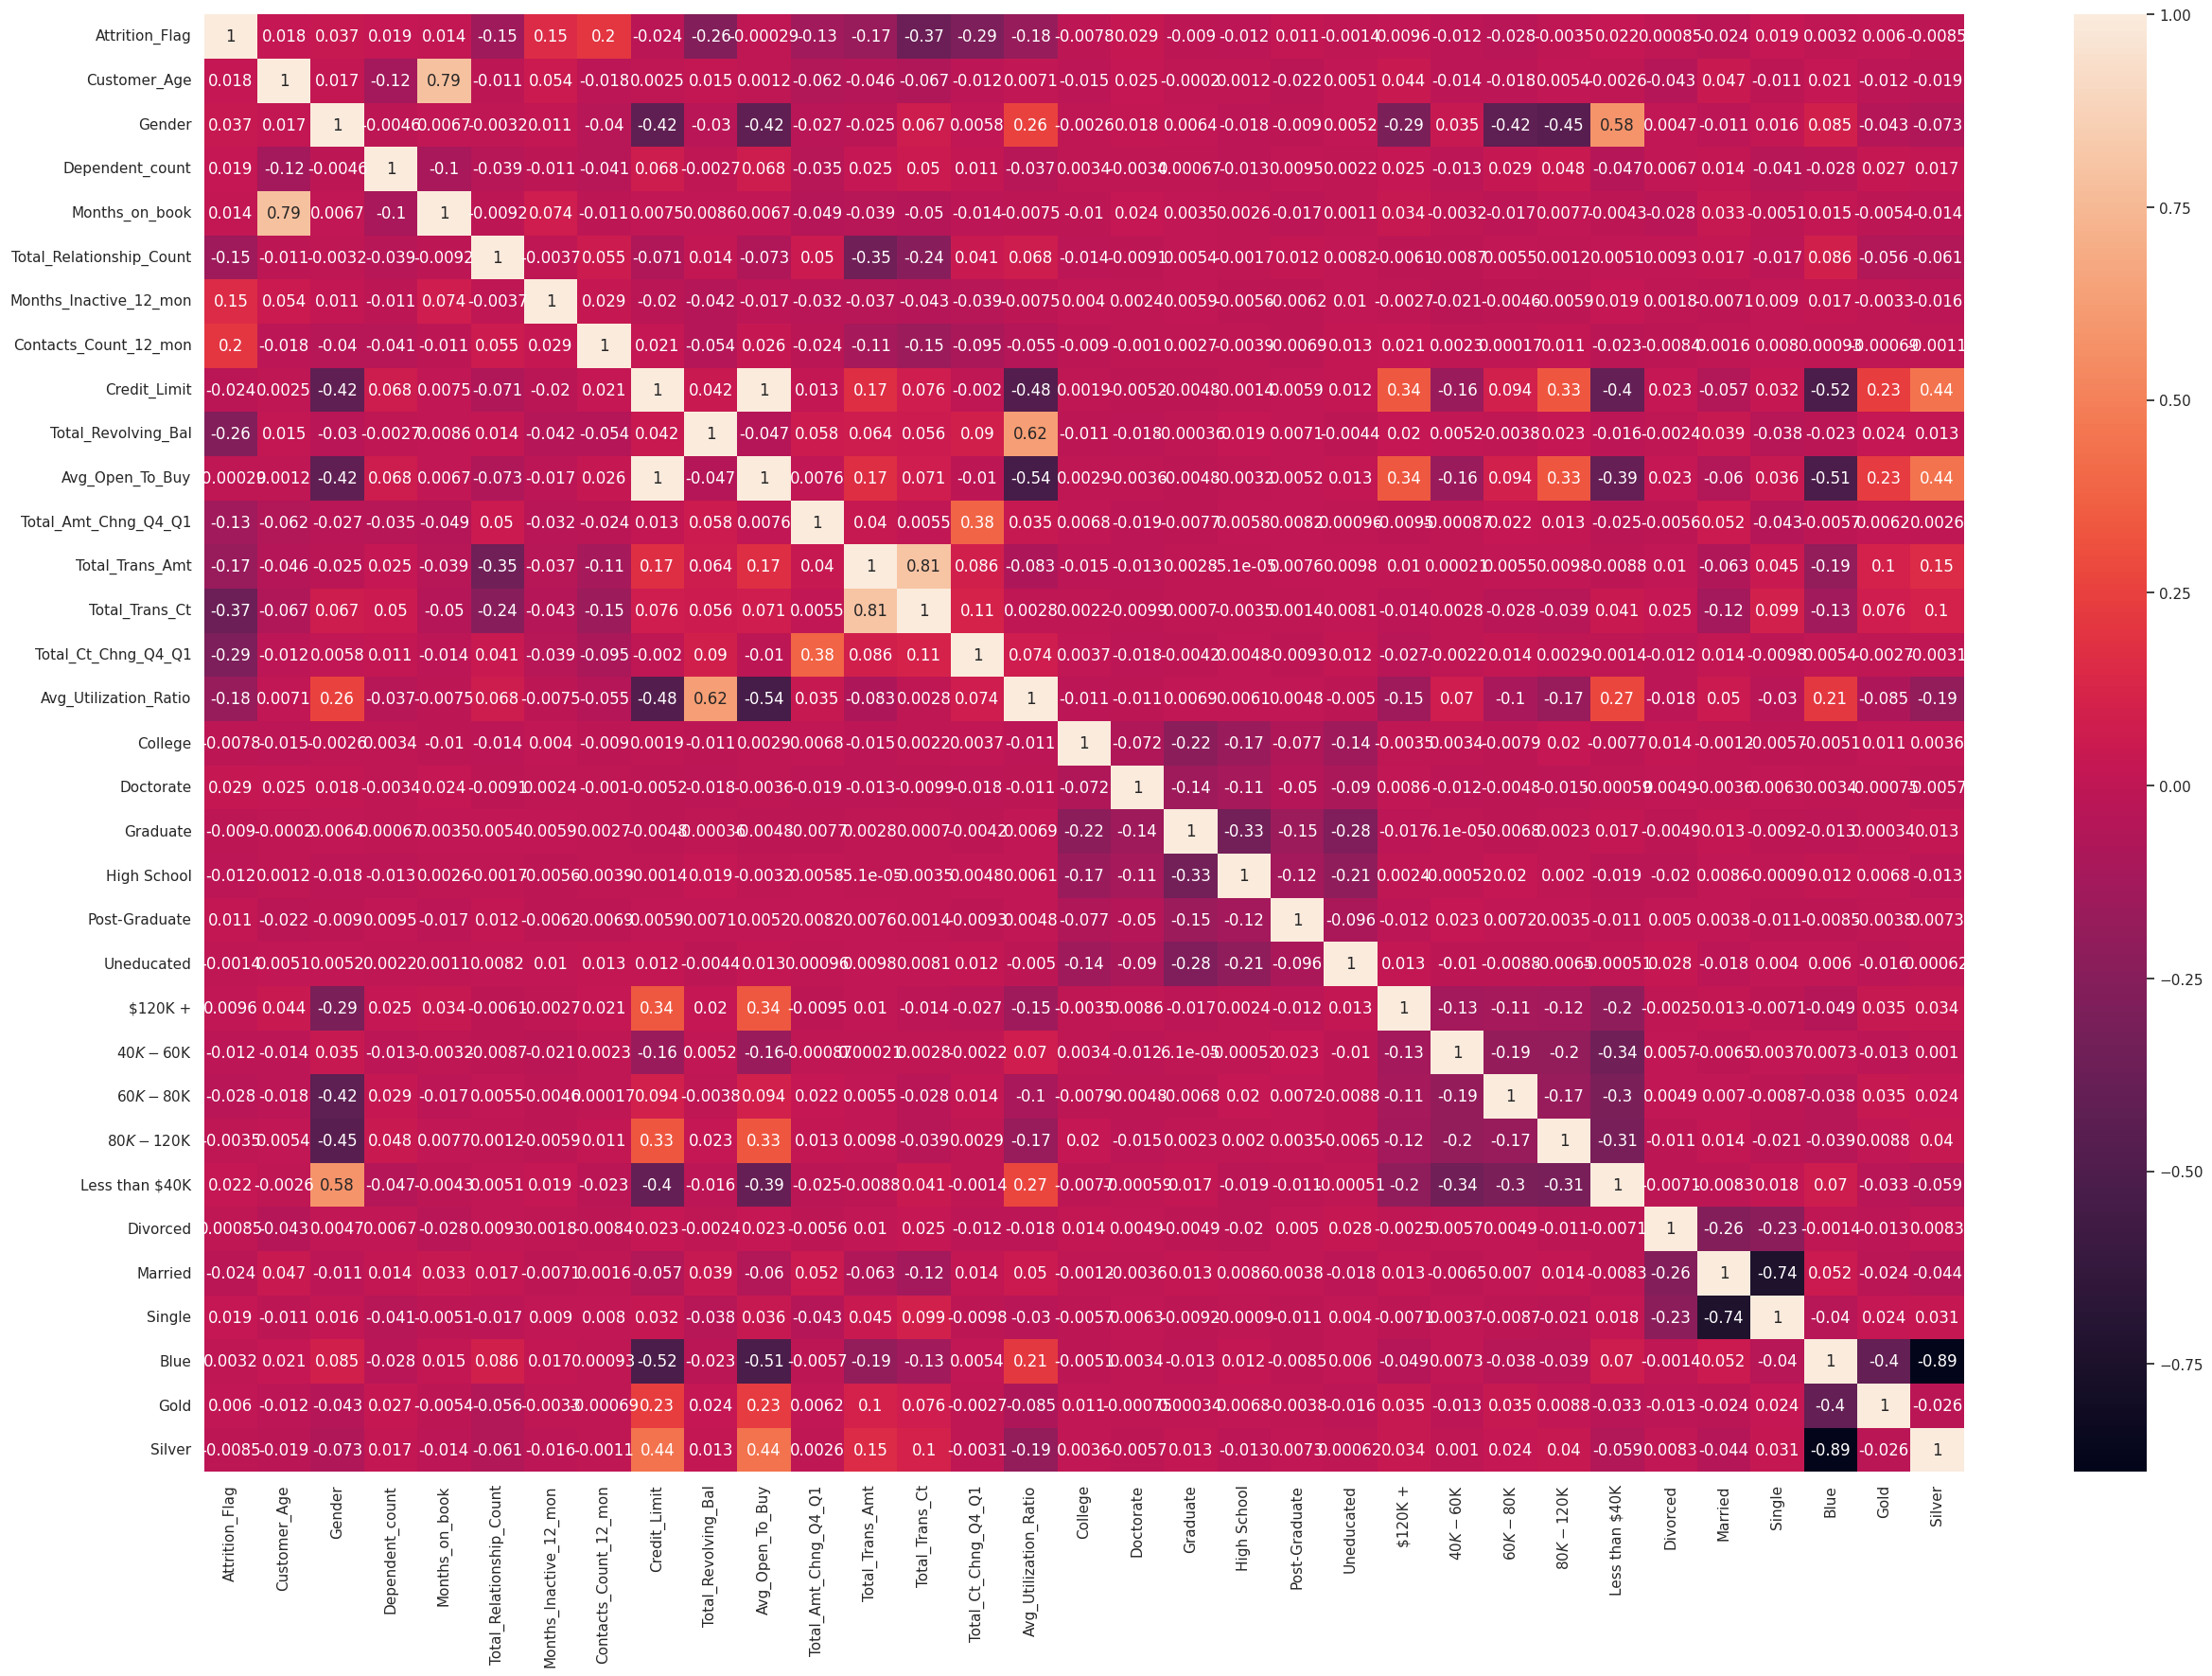

In [ ]:
fig = plt.figure()
fig.set_size_inches(30, 20)
sb.set(font_scale = 1)

sb.heatmap(bankData.corr('pearson'), annot=True)

From the above correlation matrix, we can see that there are now quite a few variables and using all of them for modeling could pose to be a problem. I will first up-sample the data to even out the skewedness of the attrited customers and then use PCA to reduce the number of encoded features in the dataset.

# **Step 2: Up-sample the Dataset Using SMOTE**

In [ ]:
smote_sample = SMOTE()

X, y = smote_sample.fit_resample(bankData[bankData.columns[1:]], bankData[bankData.columns[0]])

up_sampData = X.assign(Attrition = y)

In [ ]:
up_sampData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              17000 non-null  int64  
 1   Gender                    17000 non-null  int64  
 2   Dependent_count           17000 non-null  int64  
 3   Months_on_book            17000 non-null  int64  
 4   Total_Relationship_Count  17000 non-null  int64  
 5   Months_Inactive_12_mon    17000 non-null  int64  
 6   Contacts_Count_12_mon     17000 non-null  int64  
 7   Credit_Limit              17000 non-null  float64
 8   Total_Revolving_Bal       17000 non-null  int64  
 9   Avg_Open_To_Buy           17000 non-null  float64
 10  Total_Amt_Chng_Q4_Q1      17000 non-null  float64
 11  Total_Trans_Amt           17000 non-null  int64  
 12  Total_Trans_Ct            17000 non-null  int64  
 13  Total_Ct_Chng_Q4_Q1       17000 non-null  float64
 14  Avg_Ut

In [ ]:
ex.pie(up_sampData, names='Attrition', title='Proportion of Attrited vs Existing Customers')


# **Step 3: Use PCA Feature Reduction to Reduce the Number of Encoded Features in the Dataset¶**
**Split Encoded Columns from the Main Dataframe**

In [ ]:
encoded_cols = up_sampData[up_sampData.columns[15:-1]]

up_sampData = up_sampData.drop(columns=up_sampData.columns[15:-1])

In [ ]:
up_sampData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              17000 non-null  int64  
 1   Gender                    17000 non-null  int64  
 2   Dependent_count           17000 non-null  int64  
 3   Months_on_book            17000 non-null  int64  
 4   Total_Relationship_Count  17000 non-null  int64  
 5   Months_Inactive_12_mon    17000 non-null  int64  
 6   Contacts_Count_12_mon     17000 non-null  int64  
 7   Credit_Limit              17000 non-null  float64
 8   Total_Revolving_Bal       17000 non-null  int64  
 9   Avg_Open_To_Buy           17000 non-null  float64
 10  Total_Amt_Chng_Q4_Q1      17000 non-null  float64
 11  Total_Trans_Amt           17000 non-null  int64  
 12  Total_Trans_Ct            17000 non-null  int64  
 13  Total_Ct_Chng_Q4_Q1       17000 non-null  float64
 14  Avg_Ut

## **Using PCA (Principal Component Analysis) to Reduce the Number of Encoded Variables in the Dataset**

Using principal component analysis to reduce the dimensionality of the encoded categorical variables will lose some of the variances in the data but as a result of this, using only a few of the principal components instead of all the encoded features will help to construct a better model.

Text(0, 0.5, 'Explained Variance')

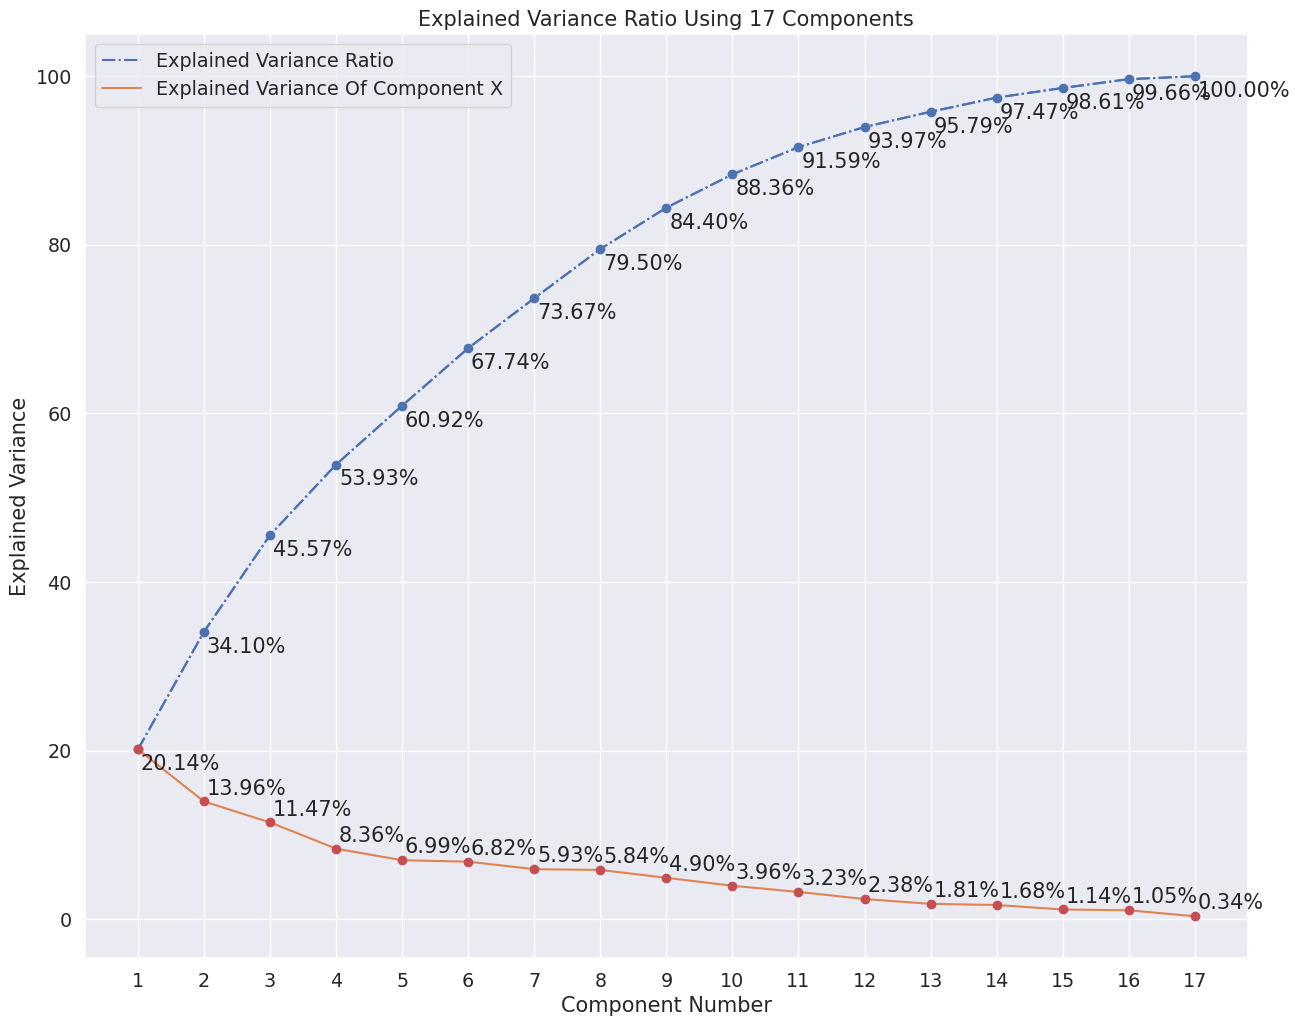

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 12)
sb.set(font_scale = 1.25)

N_COMPONENTS = len(encoded_cols.columns)

pca = PCA(n_components = N_COMPONENTS)

pc_matrix = pca.fit_transform(encoded_cols)

evr = pca.explained_variance_ratio_ * 100
cumsum_evr = np.cumsum(evr)

ax = sb.lineplot(x=np.arange(1, len(cumsum_evr) + 1), y=cumsum_evr, label='Explained Variance Ratio')
ax.lines[0].set_linestyle('-.')
ax.set_title('Explained Variance Ratio Using {} Components'.format(N_COMPONENTS))
ax.plot(np.arange(1, len(cumsum_evr) + 1), cumsum_evr, 'bo')

for x, y in zip(range(1, len(cumsum_evr) + 1), cumsum_evr):
    plt.annotate("{:.2f}%".format(y), (x, y), xytext=(2, -15),
                 textcoords="offset points", annotation_clip = False)

ax = sb.lineplot(x=np.arange(1, len(cumsum_evr) + 1), y=evr, label='Explained Variance Of Component X')
ax.plot(np.arange(1, len(evr) + 1), evr,'ro')
ax.lines[1].set_linestyle('-.')
ax.set_xticks([i for i in range(1, len(cumsum_evr) + 1)])

for x, y in zip(range(1, len(cumsum_evr) + 1), evr):
    if x != 1:
        plt.annotate("{:.2f}%".format(y), (x, y), xytext=(2, 5),
                     textcoords="offset points", annotation_clip = False)

ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')

The graph above shows the explained variance of each PCA component, along with the cumulative sum of the components above. Looking at the values above, we can use 8 of the 17 PCA components because it reduces the total number of enocded features by over half, while still explaining roughly 80% of the encoded data

## **Add Specified PCA Components to the Up-Sampled Dataframe**


In [ ]:
up_sampData_PCA = pd.concat([up_sampData,
                             pd.DataFrame(pc_matrix, columns=['PC-{}'.format(i) for i in range(1, N_COMPONENTS + 1)])], axis=1)

up_sampData_PCA = up_sampData_PCA[up_sampData_PCA.columns[:24]]

up_sampData_PCA.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Avg_Utilization_Ratio,Attrition,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,45,0,3,39,5,1,3,12691.0,777,11914.0,...,0.061,0,-0.691902,-0.387220,-0.341237,0.718138,0.369581,-0.408016,0.732619,-0.248295
1,49,1,5,44,6,1,2,8256.0,864,7392.0,...,0.105,0,0.712580,0.933099,0.637528,0.144047,0.024716,-0.014275,-0.015291,-0.060415
2,51,0,3,36,4,1,0,3418.0,0,3418.0,...,0.000,0,-0.721367,-0.153391,0.867016,0.130508,0.576539,0.196213,-0.569763,-0.174888
3,40,1,4,34,3,4,1,3313.0,2517,796.0,...,0.760,0,0.065712,0.589753,-0.676836,0.157572,0.151850,-0.732772,-0.102256,0.045404
4,40,0,3,21,5,1,0,4716.0,0,4716.0,...,0.000,0,-0.675284,-0.355481,-0.173653,0.095045,-0.017658,0.718714,0.831092,-0.341365


# **Part 3: Model Evaluation and Selection**

The KNN classifier is used

## **Step 1: Split Dataset into Train and Test Sets**

In [ ]:
X = up_sampData_PCA.drop('Attrition', axis=1)
y = up_sampData_PCA['Attrition']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the classifier to the data
knn.fit(X, y)
# Make predictions
predictions = knn.predict(X)
# Evaluate the classifier
confusion_matrix(y, predictions, labels=None, sample_weight=None, normalize=None)

array([[7939,  561],
       [ 243, 8257]])

In [ ]:
predictions

array([0, 1, 1, ..., 1, 1, 1])

[Text(0, 0.5, 'Predicted Not Attrited'), Text(0, 1.5, ' Predicted Attrited')]

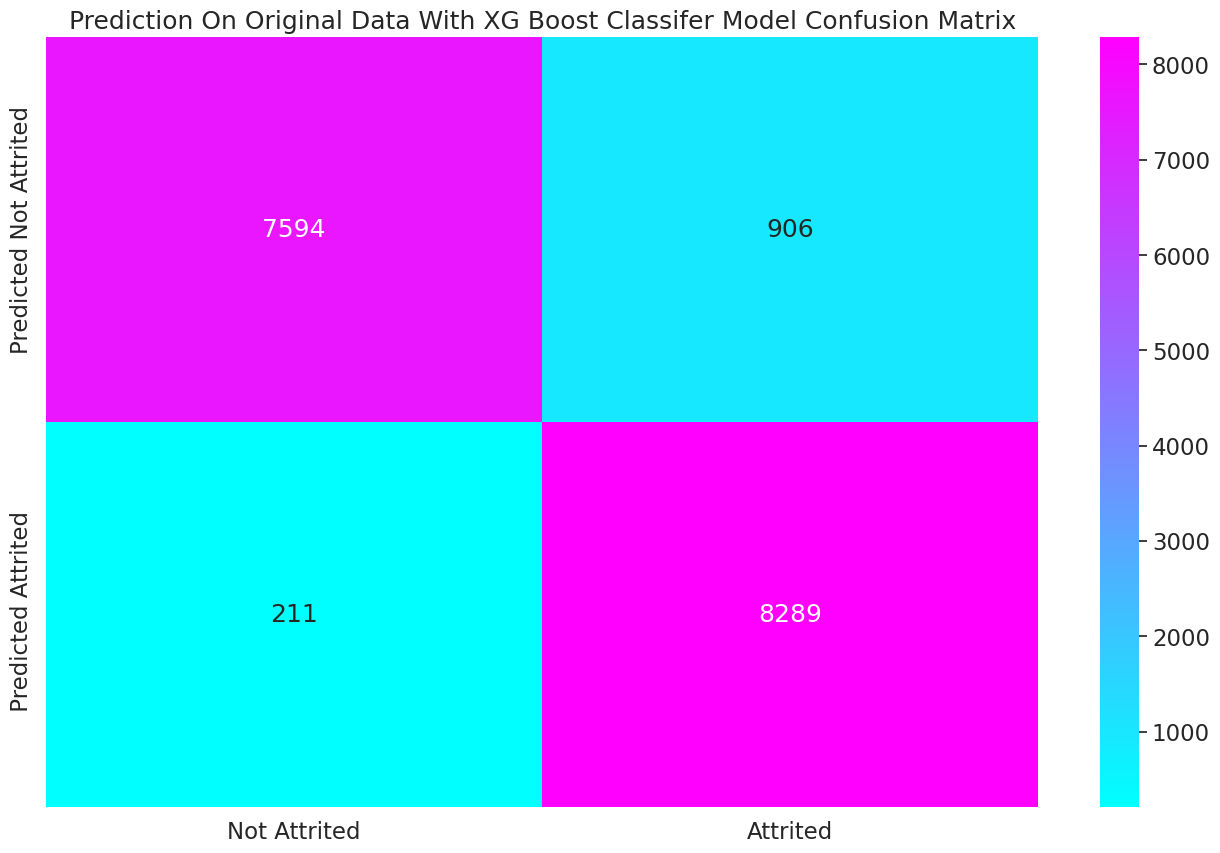

In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 10)
sb.set(font_scale = 1.5)

conf = sb.heatmap(confusion_matrix(y, predictions),
                  annot=True, cmap='cool', fmt='d')

conf.set_title('Prediction On Original Data With XG Boost Classifer Model Confusion Matrix')
conf.set_xticklabels(['Not Attrited', 'Attrited'])
conf.set_yticklabels(['Predicted Not Attrited',' Predicted Attrited'])